In [12]:
# load cnf files
import os
from analysis import get_cnf_paths
from config import CNF_DIR


cnfs = [os.path.join(CNF_DIR, f) for f in os.listdir(CNF_DIR) if f.endswith(".cnf")]
cnfs

['./cnfs/paper/s1488.bench.cnf',
 './cnfs/paper/c499.isc.cnf',
 './cnfs/paper/s832.bench.cnf',
 './cnfs/paper/bw_large.a.cnf',
 './cnfs/paper/s510.bench.cnf',
 './cnfs/paper/ais10.cnf',
 './cnfs/paper/s713.bench.cnf',
 './cnfs/paper/par16-5.cnf',
 './cnfs/paper/C171_FR.cnf',
 './cnfs/paper/C230_FR.cnf',
 './cnfs/paper/par16-3.cnf',
 './cnfs/paper/c432.isc.cnf',
 './cnfs/paper/qg3-08.cnf',
 './cnfs/paper/C210_FVF.cnf',
 './cnfs/paper/ra.cnf',
 './cnfs/paper/tire-3.cnf',
 './cnfs/paper/par16-1-c.cnf',
 './cnfs/paper/par16-2-c.cnf',
 './cnfs/paper/2bitcomp_5.cnf',
 './cnfs/paper/s1238.bench.cnf',
 './cnfs/paper/ssa7552-038.cnf',
 './cnfs/paper/qg6-09.cnf',
 './cnfs/paper/log-2.cnf',
 './cnfs/paper/log-3.cnf',
 './cnfs/paper/tire-4.cnf',
 './cnfs/paper/s838.1.bench.cnf',
 './cnfs/paper/cnt06.shuffled.cnf',
 './cnfs/paper/s1423.bench.cnf',
 './cnfs/paper/tire-2.cnf',
 './cnfs/paper/bw_large.b.cnf',
 './cnfs/paper/s1196.bench.cnf',
 './cnfs/paper/huge.cnf',
 './cnfs/paper/s1494.bench.cnf',
 

In [13]:
import pandas as pd

cnf_stats = []
for cnf in cnfs:
    with open(cnf, "r") as f:
        for line in f:
            if line.startswith('p'):
                _, _, vars, clauses = line.split()
                cnf_name = os.path.basename(cnf)
                cnf_stats.append({
                    "cnf": cnf_name,
                    "vars": int(vars),
                    "clauses": int(clauses)
                })

df = pd.DataFrame(cnf_stats)
df

,cnf,vars,clauses
0,s1488.bench.cnf,667,2040
1,c499.isc.cnf,243,714
2,s832.bench.cnf,310,1056
3,bw_large.a.cnf,459,4675
4,s510.bench.cnf,236,635
5,ais10.cnf,181,3151
6,s713.bench.cnf,447,984
7,par16-5.cnf,1015,3358
8,C171_FR.cnf,1758,4005
9,C230_FR.cnf,1808,4767


In [14]:
from analysis import load_data
from config import STATS_DIR

stats = []
for f in os.listdir(STATS_DIR):
    if not f.endswith(".json"):
        continue
    basename = os.path.basename(f)
    json_data = load_data(f"{STATS_DIR}{f}")
    if "compile_time" not in json_data:
        json_data["compile_time"] = json_data["total_time"]

    json_data["cnf"] = basename[:-5] # strip .json
    stats.append(json_data)

stats_df = pd.DataFrame(stats)

# remove 0 columns
stats_df = stats_df.loc[:, (stats_df != 0).any(axis=0)]

stats_df = stats_df.sort_values("compile_time", ascending=False).reset_index(drop=True)

stats_df

,compile_time,total_time,sat_is_instantiated_var,sat_is_irrelevant_var,sat_var_count,sat_var2pliteral,sat_var2nliteral,sat_is_implied_literal,sat_decide_literal,sat_undo_decide_literal,...,nnf_disjoin,nnf_manager_set_root,nnf_manager_save_to_file,vtree_manager_new,vtree_manager_free,vtree_print_widths,vtree_is_leaf,vtree_is_shannon_node,vtree_shannon_var,cnf
0,27181.396,27237.622,909.777652,0.871674,0.000001,1035.793806,1041.119500,2008.776166,17.224857,6.234273,...,1.341091,0.000008,16.318165,39.813695,0.360784,0.000075,364.458118,1020.566058,914.173560,prob004-log-a.cnf
1,13799.684,13808.531,575.099270,4.944061,0.000001,806.343066,808.052035,1448.609777,78.915331,15.380471,...,12.010422,0.000000,8.623953,0.070235,0.661774,0.000022,309.773625,680.321595,573.531495,c1355.isc.cnf
2,10030.668,10030.668,72.144848,1.066164,0.000000,560.438095,560.732328,1119.668392,2.524837,1.823033,...,1.890654,0.000001,3.452397,1.312161,0.537111,0.000059,42.997515,113.049358,72.329392,C230_FR.cnf
3,7561.005,7576.155,258.965074,2.411103,0.000001,382.108537,384.270887,732.190080,8.061109,5.029485,...,4.407581,0.000001,14.898303,0.097394,0.621486,0.000014,123.251013,278.453718,256.357535,2bitmax_6.cnf
4,3424.955,3428.717,26.885675,1.636312,0.000001,272.913739,274.294711,538.360062,6.513439,4.098764,...,4.901688,0.000000,3.591677,0.134315,0.071803,0.000033,14.691126,31.618464,26.778892,s1423.bench.cnf
5,3368.799,3372.480,74.018174,2.038496,0.000000,212.665179,213.293149,407.394660,18.568823,4.521849,...,4.086468,0.000000,3.554694,0.035011,0.486802,0.000010,48.925143,100.408529,73.694703,c499.isc.cnf
6,3246.482,3248.245,13.010410,0.434538,0.000001,242.570421,242.762318,485.654854,1.008451,0.728904,...,0.667717,0.000000,0.696071,1.011333,0.260221,0.000063,7.268801,21.183028,12.931809,C210_FVF.cnf
7,3143.464,3146.635,24.667613,0.322847,0.000001,205.974156,206.447235,412.674388,1.048727,0.672823,...,0.480843,0.000001,0.352278,2.785485,0.090460,0.000061,14.517318,36.879054,24.513931,C163_FW.cnf
8,2978.480,2979.280,3.757560,1.645974,0.000000,158.436662,159.462530,312.111351,608.095223,9.731106,...,0.000071,0.000001,0.001964,0.778555,0.020763,0.000011,2.084353,3.170077,3.815652,uf250-026.cnf
9,2285.410,2289.285,8.241880,0.430545,0.000001,173.596082,173.976708,346.832008,0.718289,0.520940,...,0.270667,0.000000,0.107317,3.724139,0.070955,0.000066,4.403991,11.578756,8.258548,C638_FKA.cnf


In [15]:
joined = df.merge(stats_df, on="cnf", how="inner")
joined = joined[["cnf", "vars", "clauses", "compile_time", "total_time"]]
joined

,cnf,vars,clauses,compile_time,total_time
0,s1488.bench.cnf,667,2040,97.667,98.273
1,c499.isc.cnf,243,714,3368.799,3372.480
2,s832.bench.cnf,310,1056,83.186,83.354
3,bw_large.a.cnf,459,4675,0.153,1.767
4,s510.bench.cnf,236,635,0.633,0.698
5,ais10.cnf,181,3151,198.873,199.345
6,s713.bench.cnf,447,984,30.064,30.130
7,par16-5.cnf,1015,3358,4.570,5.201
8,C171_FR.cnf,1758,4005,189.720,190.435
9,C230_FR.cnf,1808,4767,10030.668,10030.668


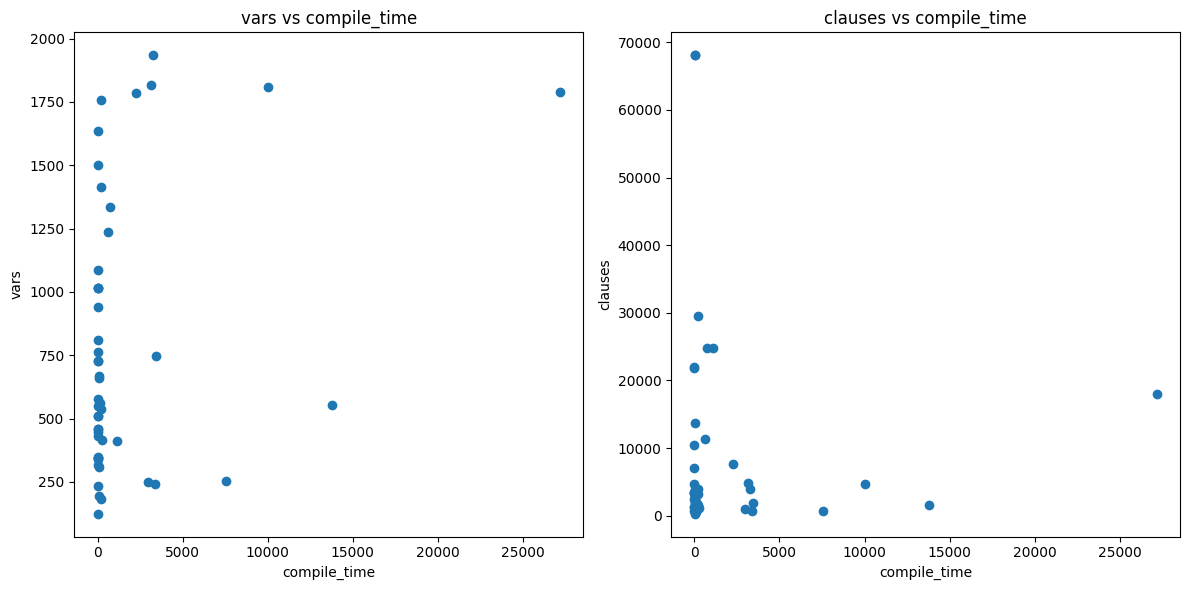

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].scatter(joined["compile_time"], joined["vars"], marker='o', linestyle='-')
axes[0].set_title('vars vs compile_time')
axes[0].set_xlabel('compile_time')
axes[0].set_ylabel('vars')

axes[1].scatter(joined["compile_time"], joined["clauses"], marker='o', linestyle='-')
axes[1].set_title('clauses vs compile_time')
axes[1].set_xlabel('compile_time')
axes[1].set_ylabel('clauses')

plt.tight_layout()

plt.show()

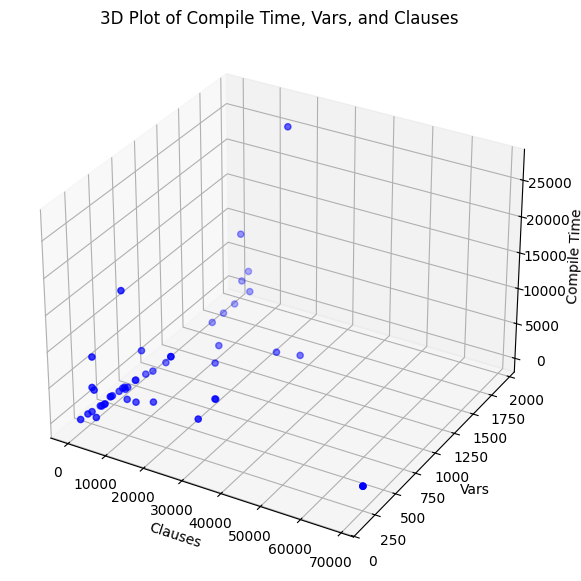

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(joined['clauses'], joined['vars'], joined['compile_time'], c='b', marker='o')

# Set labels
ax.set_xlabel('Clauses')
ax.set_ylabel('Vars')
ax.set_zlabel('Compile Time')

# Set title
ax.set_title('3D Plot of Compile Time, Vars, and Clauses')

# Show the plot
plt.show()